**Study on regression model and EDA**

*   Linear Regression
*   Neural Network
*   KNN Regressor
*   SVC  Kernel = Linear
*   Randon Forest Regressor
*   Polynomial Regression
*   Lasso Regression
*   Ridge Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/boston.csv')

Top 5 row of the data

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Finding out the number of empty cells in the dataset

In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Descriptive Statistics of the Dataset

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000




*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS - proportion of non-retail business acres per town
*   ICHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per $10,000
*   PTRATIO - pupil-teacher ratio by town

*   B - B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*    LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's






Finding out the range of the median value of owner-occupied homes

In [6]:
rng=df['MEDV'].max()-df['MEDV'].min()
rng

45.0

Conducting z test to find out outliers

In [7]:
x=df["MEDV"]
mean=df["MEDV"].mean()
std=df["MEDV"].std()
z= (x-mean)/std
z

0      0.159528
1     -0.101424
2      1.322937
3      1.181589
4      1.486032
         ...   
501   -0.014440
502   -0.210154
503    0.148655
504   -0.057932
505   -1.156104
Name: MEDV, Length: 506, dtype: float64

Adding the z values to the dataset

In [8]:
df["z-score"]=z

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,z-score
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0.159528
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,-0.101424
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1.322937
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1.181589
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1.486032


Plotting the z values

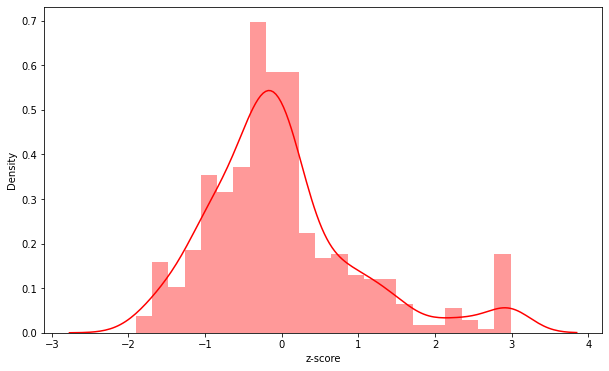

In [10]:
ax=plt.figure(figsize=(10,6))
sns.distplot(df['z-score'],color="red")

In [11]:
#outliers

outl=df[df["z-score"]>2.9]
outl

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,z-score
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0,2.986505
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0,2.986505
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0,2.986505
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0,2.986505
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0,2.986505
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0,2.986505
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0,2.986505
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0,2.986505
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0,2.986505
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44,50.0,2.986505


In [12]:
df = df[~(df['z-score'] >2.98)]

There are certain values present outside the threshold of 99.7%

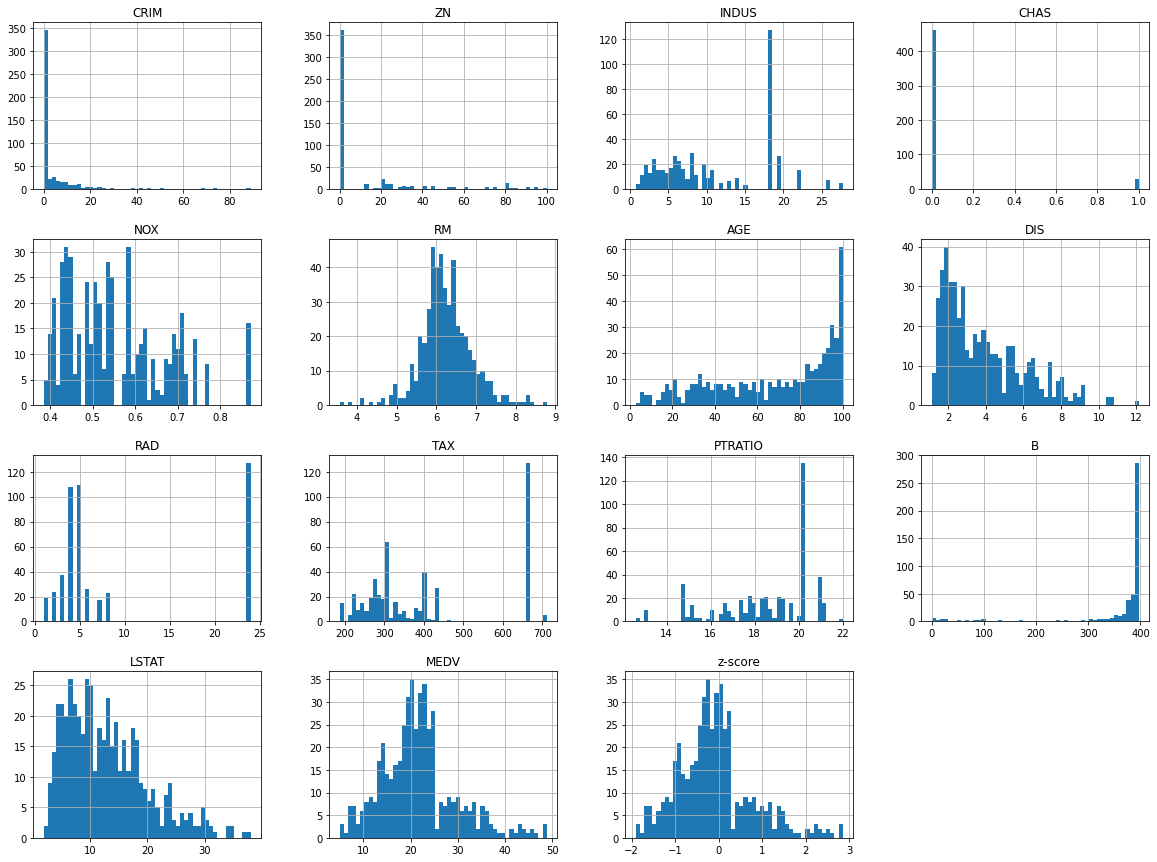

In [13]:
df.hist(bins=50, figsize=(20,15));

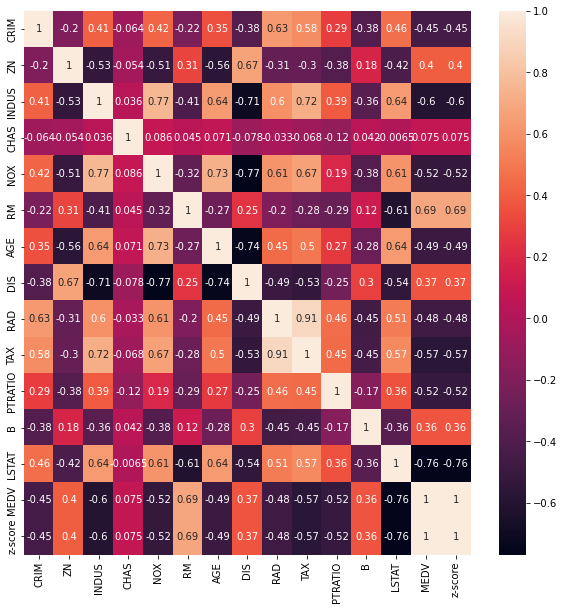

In [14]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

#MODEL 01 (MEDV) - Cross Validation and Grid Search


From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

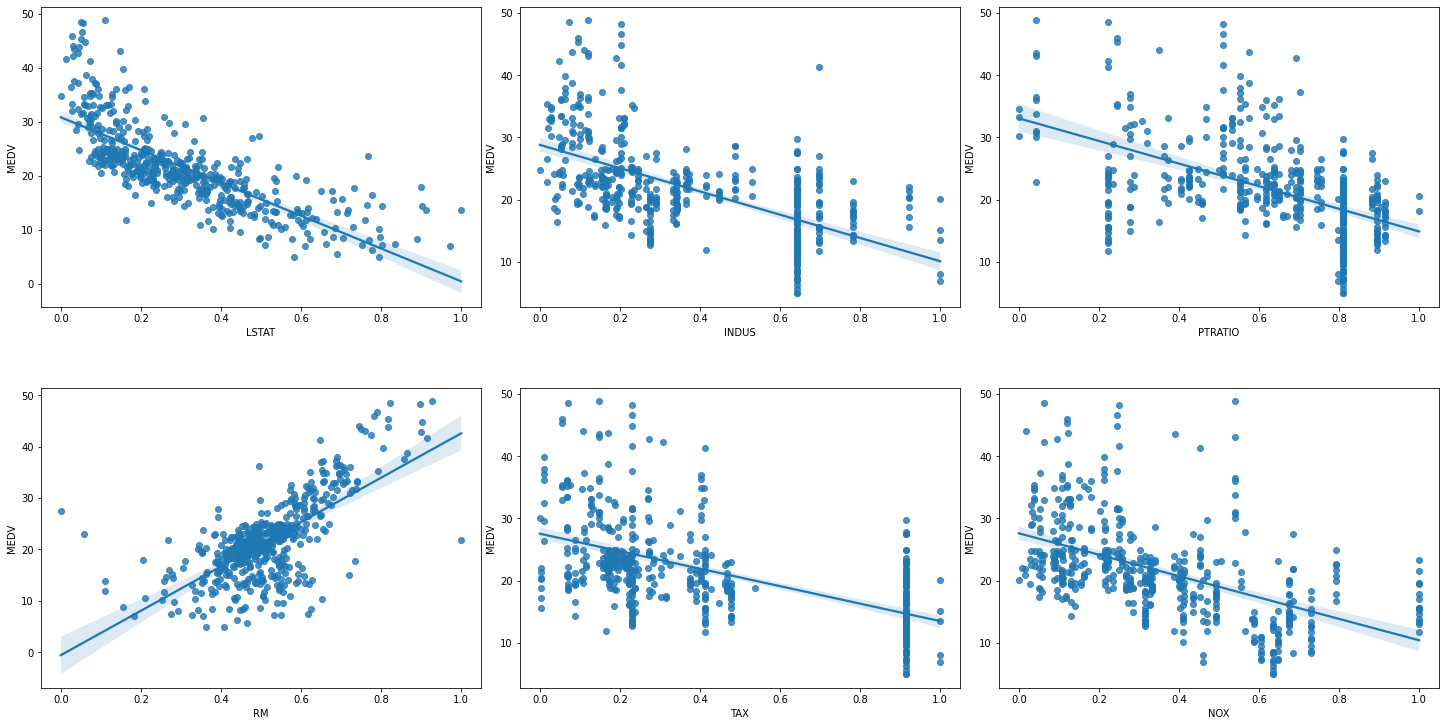

In [15]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'PTRATIO', 'RM', 'TAX','NOX']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[['INDUS', 'RM', 'TAX', 'PTRATIO','LSTAT','NOX']]
y = df['MEDV']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

LN: 0.713166 (0.054634)
NN: 0.739516 (0.050099)
KNN: 0.665844 (0.082138)
RF: 0.833341 (0.025588)
SVR: 0.344243 (0.027653)


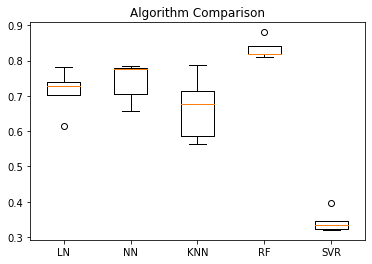

In [21]:
# Spot Check Algorithms
models = []
models.append(('LN', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    
 cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

**Grid Search**

In [22]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
  predict = np.array(predict)
  actual = np.array(actual)
  distance = predict - actual
  square_distance = distance ** 2
  mean_square_distance = square_distance.mean()
  score = np.sqrt(mean_square_distance)
  return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = [{'n_estimators': [3,10,30,100], 'max_features': [2,4,6,8]},
              {'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]},]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring=rmse_score, return_train_score=True)
grid_search.fit(X_train, y_train)

best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print('Best Score: ', grid_search.best_score_)
print('Best Params: ', grid_search.best_params_)

Best Score:  -2.887411921531042
Best Params:  {'max_features': 2, 'n_estimators': 30}


In [25]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.8766
r2:  0.8698
MAE:  1.9698
MSE:  6.6532
RMSE:  2.5794


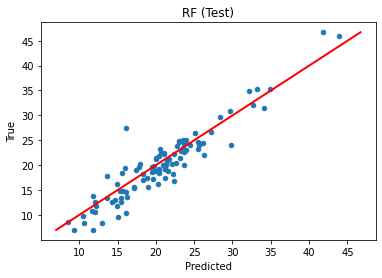

In [26]:
plt.scatter(y_pred, y_true, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("RF (Test)")
plt.show()

# MODEL 02 (MEDV) - With all features CORR >= 0.38


In [27]:
X = df[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']]
y = df['MEDV']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Cross Validation with**

1.   Linear Regression
2.   Neural Network
3.   K Newighbors Regressor
4.   Randon Forrest Regressor
5.   Suport Vector Regressor  (SVR)  Kernel Linear



LN: 0.721662 (0.050787)
NN: 0.714096 (0.057257)
KNN: 0.563010 (0.082670)
RF: 0.844322 (0.038515)
SVR: 0.073056 (0.019621)


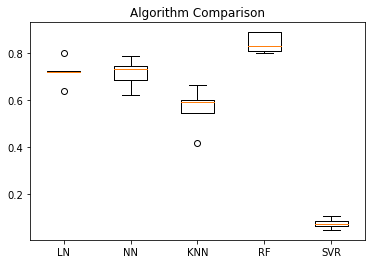

In [29]:
# Spot Check Algorithms
models = []


models.append(('LN', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    
 cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

The best results between the models is Randon Forrest

Let's execute Grid Search

**Grid Search**

In [30]:
param_grid = [{'n_estimators': [3,10,30,100], 'max_features': [2,4,6,8]},
              {'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]},]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring=rmse_score, return_train_score=True)
grid_search.fit(X_train, y_train)

best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print('Best Score: ', grid_search.best_score_)
print('Best Params: ', grid_search.best_params_)

Best Score:  -2.837070031229361
Best Params:  {'max_features': 4, 'n_estimators': 100}


**Metrics**

In [31]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.8804
r2:  0.8753
MAE:  1.9263
MSE:  6.3709
RMSE:  2.5241


**Plot**

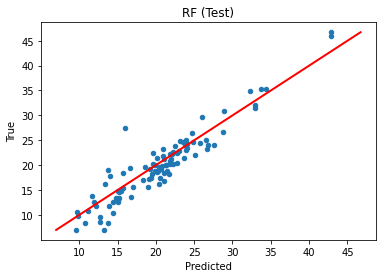

In [32]:
plt.scatter(y_pred, y_true, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("RF (Test)")
plt.show()

#MODEL 03 (MEDV) - Cross Validation Advanced Linear Regression


In [33]:
X = df[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']]
y = df['MEDV']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Adding Polinomial Features and Scaler the data**  for performe regularized linear models

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly_fea = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train  = poly_fea.fit_transform(X_train)
X_poly_test  = poly_fea.fit_transform(X_test)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_poly_train)
X_test_scaled = scaler.transform(X_poly_test)

In [37]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

Cross Validation with

Linear Regression
Lasso Regression
Ridge Regression

LN: -1.459142 (2.343569)
LS: 0.745048 (0.076681)
RD: 0.845197 (0.071335)


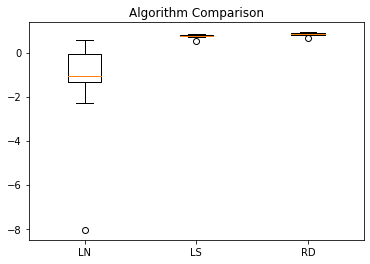

In [38]:
models = []

models.append(('LN', LinearRegression()))
models.append(('LS', Lasso()))  
models.append(('RD', Ridge()))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    
 cv_results = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [39]:
parameters = {'alpha':[0.05, 0.1 ,1, 10]}

# define the model/ estimator
model = Ridge()

# define the grid search
grid_search= GridSearchCV(model, parameters, cv=10,
                           scoring=rmse_score, return_train_score=True)
#fit the grid search
grid_search.fit(X_train_scaled,y_train)

# best estimator
print(grid_search.best_estimator_)

# best model
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled,y_train)

Ridge(alpha=1)


Ridge(alpha=1)

In [40]:
y_true = y_test
y_pred = best_model.predict(X_test_scaled)
regression_results(y_true, y_pred)

explained_variance:  0.8644
r2:  0.8626
MAE:  1.9852
MSE:  7.2138
RMSE:  2.6859


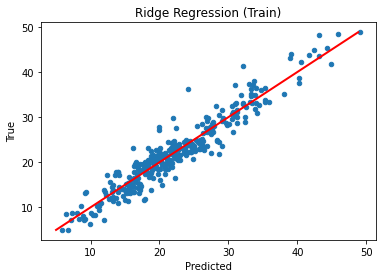

In [41]:
plt.scatter(best_model.predict(X_train_scaled), y_train, s=20)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Ridge Regression (Train)")
plt.show()

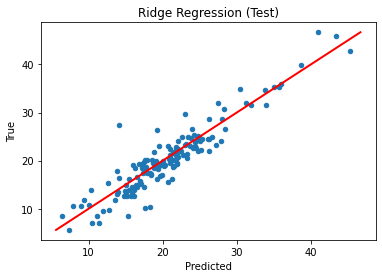

In [42]:
plt.scatter(best_model.predict(X_test_scaled), y_test, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Ridge Regression (Test)")
plt.show()

# MODEL 04 (TAX)  features corr > 0.5

In [43]:
rng=df['TAX'].max()-df['TAX'].min()
rng

524.0

Conducting z test to find out outliers

In [44]:
x=df["TAX"]
mean=df["TAX"].mean()
std=df["TAX"].std()
z= (x-mean)/std
z

0     -0.666420
1     -0.987724
2     -0.987724
3     -1.106726
4     -1.106726
         ...   
501   -0.803272
502   -0.803272
503   -0.803272
504   -0.803272
505   -0.803272
Name: TAX, Length: 490, dtype: float64

Adding the z values to the dataset

In [45]:
df["z-score"]=z

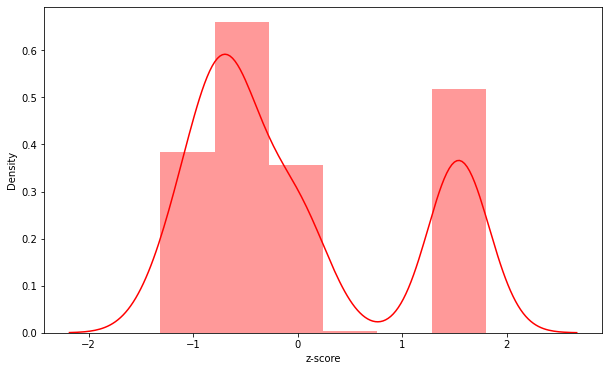

In [46]:
ax=plt.figure(figsize=(10,6))
sns.distplot(df['z-score'],color="red")

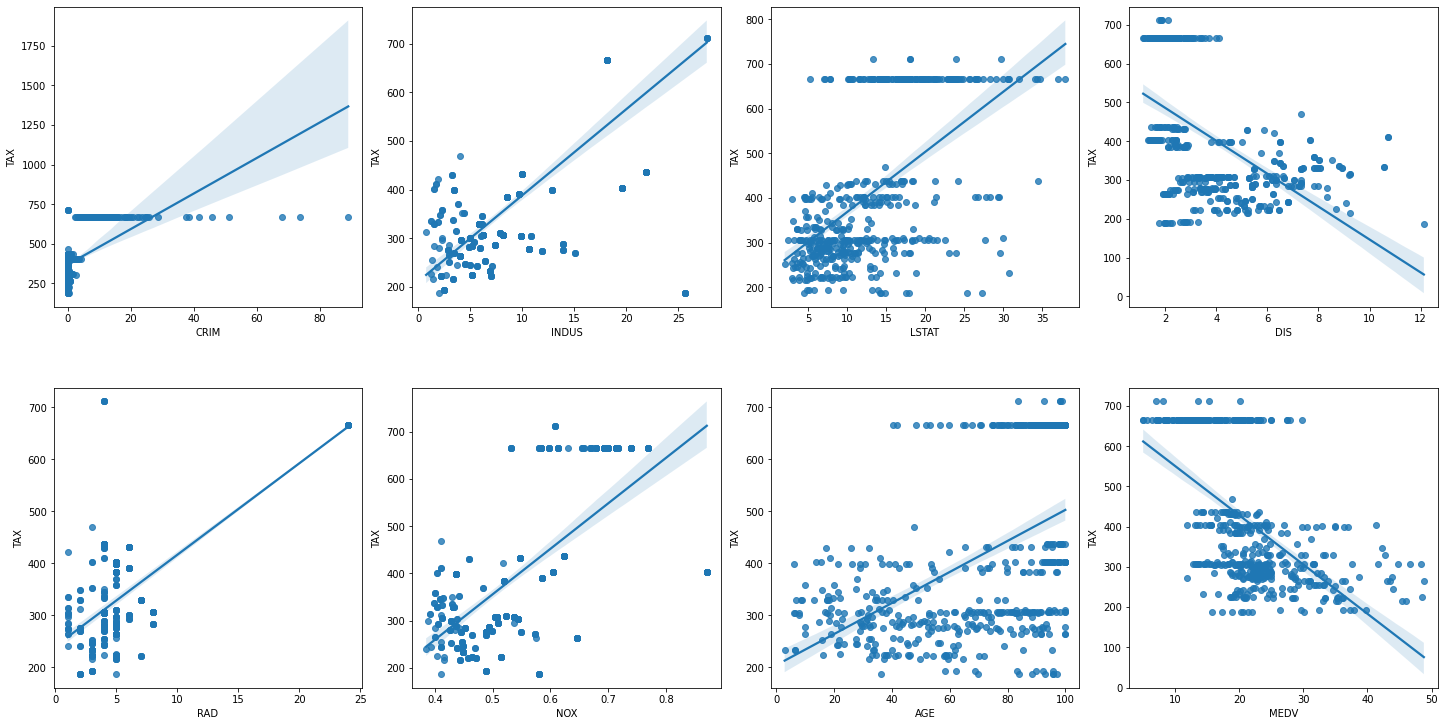

In [47]:
column_sels = ['CRIM','INDUS', 'LSTAT', 'DIS', 'RAD','NOX','AGE','MEDV']

x = df.loc[:,column_sels]
y = df['TAX']

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [48]:
X = df[['CRIM','INDUS', 'LSTAT', 'DIS', 'RAD','NOX','AGE','MEDV']]
y = df['TAX']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

LN: 0.862796 (0.027967)
NN: 0.854739 (0.028346)
KNN: 0.859309 (0.040825)
RF: 0.948100 (0.017435)
SVR: -0.212355 (0.107859)


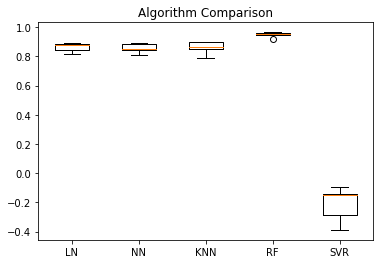

In [50]:
# Spot Check Algorithms
models = []
models.append(('LN', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    
 cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

**Grid Search**

In [51]:
param_grid = [{'n_estimators': [3,10,30,100,200], 'max_features': [2,4,6,8,10]},
              {'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]},]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring=rmse_score, return_train_score=True)
grid_search.fit(X_train, y_train)

best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print('Best Score: ', grid_search.best_score_)
print('Best Params: ', grid_search.best_params_)

Best Score:  -32.76457670441206
Best Params:  {'max_features': 8, 'n_estimators': 3}


In [52]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.9655
r2:  0.9638
MAE:  14.9048
MSE:  1043.0212
RMSE:  32.2958


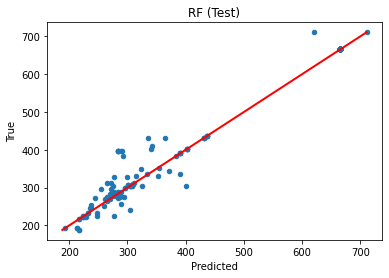

In [53]:
plt.scatter(y_pred, y_true, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("RF (Test)")
plt.show()